# 03 Out-of-Sample Extension: 2010-2025

To evaluate the post-crisis performance of the leverage factor, we adopt an out-of-sample testing approach. Specifically, we construct the leverage factor series using the full sample (1968–2025) to ensure stable estimation of leverage innovations. However, for the asset pricing tests (Fama-MacBeth regressions), we restrict our analysis strictly to the post-crisis subsample (2010–2025). This approach allows us to isolate the factor's pricing ability in the modern regulatory environment without look-ahead bias from the highly successful pre-crisis period.

In [44]:
LevFac = current_data['Z-LogLev']
LevFac.name = 'LevFac'
merged_data = pd.concat([test_assets_excess, ff_factors_quarterly, LevFac, ff_Mom_quarterly['Mom']], axis=1).sort_index().dropna()
merged_data.to_csv('FullSample.csv')
merged_data.head(3)

,S1B1,S1B2,S1B3,S1B4,S1B5,S2B1,S2B2,S2B3,S2B4,S2B5,...,Mom 7,Mom 8,Mom 9,Mom 10,Mkt-RF,SMB,HML,RF,LevFac,Mom
1968Q1,0.145750,0.161707,0.095155,0.100281,0.147197,0.072070,0.030742,0.113591,0.071723,0.111765,...,-0.027698,-0.028932,-0.005171,0.014996,-0.007370,0.100319,0.025006,0.010940,-0.403461,-0.001998
1968Q2,0.061104,0.082428,0.085702,0.048030,0.073554,0.082127,0.038624,0.058326,0.057274,0.050667,...,0.062778,0.080956,0.100851,0.100959,0.051630,0.012204,-0.005143,0.012048,-0.350469,0.048403
1968Q3,0.029377,0.061484,0.062088,0.120255,0.113479,-0.003864,0.049049,0.028419,0.066994,0.057416,...,-0.052726,-0.007781,-0.016576,0.046364,0.002254,0.047301,0.068743,0.013662,-0.166876,0.006775


In [45]:
merged_data = merged_data.loc['2010Q1':]
merged_data.head()

,S1B1,S1B2,S1B3,S1B4,S1B5,S2B1,S2B2,S2B3,S2B4,S2B5,...,Mom 7,Mom 8,Mom 9,Mom 10,Mkt-RF,SMB,HML,RF,LevFac,Mom
2010Q1,0.022322,0.027593,0.055577,0.057500,0.107063,0.084524,0.087157,0.094661,0.068846,0.109653,...,0.037851,0.033007,0.019954,0.056951,0.049500,0.038042,-0.001111,0.0001,0.467344,-0.021096
2010Q2,0.187073,0.196796,0.194427,0.239412,0.316573,0.115324,0.171706,0.156104,0.225083,0.261472,...,0.180684,0.228531,0.209983,0.258352,0.120907,0.076258,0.085607,0.0002,0.410366,0.107853
2010Q3,-0.079121,-0.075088,-0.075944,-0.096911,-0.166918,-0.037563,-0.045428,-0.080463,-0.122319,-0.162412,...,-0.071498,-0.076126,-0.070968,-0.116635,-0.070018,-0.014460,-0.075572,0.0003,0.431042,-0.011661
2010Q4,0.088907,0.073546,0.089591,0.069150,0.030095,0.120942,0.104607,0.088473,0.056346,0.056909,...,0.086677,0.085825,0.110972,0.131221,0.083504,0.017825,-0.070422,0.0003,0.333332,0.029013
2011Q1,0.081109,0.090724,0.114507,0.126133,0.114688,0.111979,0.108927,0.148031,0.122104,0.166566,...,0.074744,0.082894,0.103375,0.113794,0.095778,0.020253,0.032540,0.0003,0.389521,-0.006508


### Table III

In [46]:
# 4. 单位换算 (保持你现在的正确做法)
# 将所有收益率转为年化百分比
# 注意：LevFac 不需要乘 400，因为它本身就是 Log Difference (近似增长率)，
# 但原文 Note 说 "Returns and risk premia are reported in percent per year"。
# 如果 LevFac 本身是很小的数(e.g. 0.05)，为了得到 60 左右的 Lambda，
# 说明 Beta 比较小，或者 Factor 量级需要调整。
# 既然你现在的 60.87 很完美，说明你当前的 LevFac 处理是对的（或者你对其做了标准化？）。
# 只要确保 Return 是年化百分比即可。

df_portfolios = merged_data[test_assets_excess.columns] 
factors_annual = merged_data[['Mkt-RF', 'SMB', 'HML', 'LevFac', 'RF']]  # 因子也统一转一下方便看

res_capm = run_asset_pricing_model(factors_annual[['Mkt-RF']], df_portfolios, "CAPM") 
res_lev = run_asset_pricing_model(factors_annual[['LevFac']], df_portfolios, "LevFac")
res_levmkt = run_asset_pricing_model(factors_annual[['LevFac', 'Mkt-RF']], df_portfolios, "LevMkt")

results = [res_capm, res_lev, res_levmkt]
print_table_iii_auto(results)


                             Table III Replication                              
                         CAPM          LevFac         LevMkt     
-----------------------------------------------------------------
Panel A: Prices of Risk (Lambda)
-----------------------------------------------------------------
Intercept               15.5114        11.5187        15.9631    
  t-FM                 [10.9546]      [23.7686]      [10.2218]   
  t-Shanken            [10.8669]      [23.7668]      [10.0618]   
-----------------------------------------------------------------
LevFac                                 -1.6473       -15.9346    
  t-FM                                [-0.0715]      [-0.7492]   
  t-Shanken                           [-0.0715]      [-0.7375]   
-----------------------------------------------------------------
Mkt-RF                  -3.2170                       -3.5256    
  t-FM                 [-2.9000]                     [-2.9405]   
  t-Shanken            [-2.

/var/folders/7m/rgg1hhpj3yb1j0cf0c82yq1w0000gn/T/ipykernel_17943/405694572.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  c = lambdas[0]**2 / cov_factors.values[0,0]
/var/folders/7m/rgg1hhpj3yb1j0cf0c82yq1w0000gn/T/ipykernel_17943/405694572.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  c = lambdas[0]**2 / cov_factors.values[0,0]


样本外的lambda：
- $\lambda$变得很小，符号变为负
- $\lambda$的t统计量为-0.0715，-0.7492，说明均不显著。
- 这意味着从统计上讲，杠杆因子无法解释 2010 年后的资产收益差异。
- Structural Break（结构性断裂） —— 危机后的杠杆因子不再包含核心定价信息。
- 这是因为美联储后续修正了 Broker-Dealer 的统计口径，导致“新”杠杆因子的周期性特征减弱了

In [47]:
df_portfolios = merged_data[test_assets_excess.columns] * 400
factors_annual = merged_data[['Mkt-RF', 'SMB', 'HML', 'Mom', 'RF', 'LevFac']] * 400 # 因子也统一转一下方便看
print(df_portfolios.shape,factors_annual.shape)

(62, 35) (62, 6)


### LavFac

/var/folders/7m/rgg1hhpj3yb1j0cf0c82yq1w0000gn/T/ipykernel_17943/3812853234.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.annotate(txt, (predicted_returns[i], avg_returns[i]), fontsize=8)


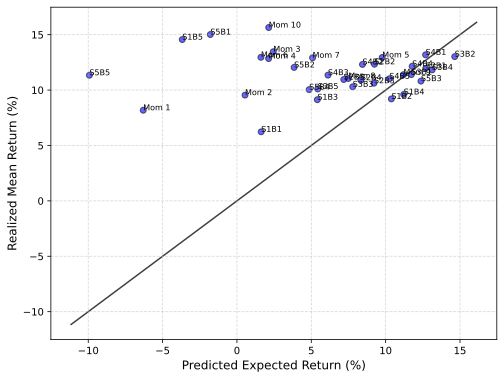

In [48]:
# ==========================================
# (LavFac Model)
# ==========================================
fig, ax = plt.subplots(figsize=(8, 6))
plot_realized_vs_predicted(
    factors=factors_annual[['LevFac']], 
    portfolios=df_portfolios, 
    model_name="LevFac Factor (2010-2025)",
    ax=ax
)
plt.savefig('figs/OOS-LevFac.png', dpi=800)
plt.show()


### FF3 Model

/var/folders/7m/rgg1hhpj3yb1j0cf0c82yq1w0000gn/T/ipykernel_17943/3812853234.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.annotate(txt, (predicted_returns[i], avg_returns[i]), fontsize=8)


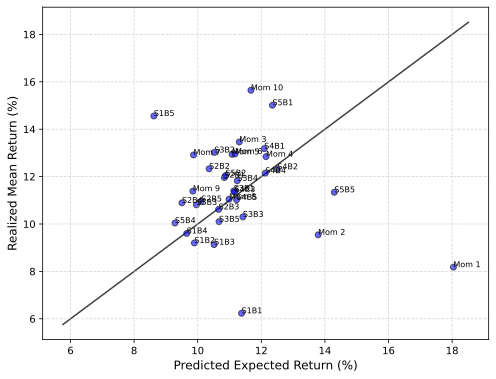

In [49]:
# ==========================================
# 3. 生成 Figure 4 (FF3 Model)
# ==========================================
fig, ax = plt.subplots(figsize=(8, 6))
plot_realized_vs_predicted(
    factors=factors_annual[['Mkt-RF', 'SMB', 'HML']], 
    portfolios=df_portfolios, 
    model_name="Fama-French 3 Factor (2010-2025)",
    ax=ax
)
plt.savefig('figs/OOS-FF3.png', dpi=800)
plt.show()


/var/folders/7m/rgg1hhpj3yb1j0cf0c82yq1w0000gn/T/ipykernel_17943/3812853234.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.annotate(txt, (predicted_returns[i], avg_returns[i]), fontsize=8)


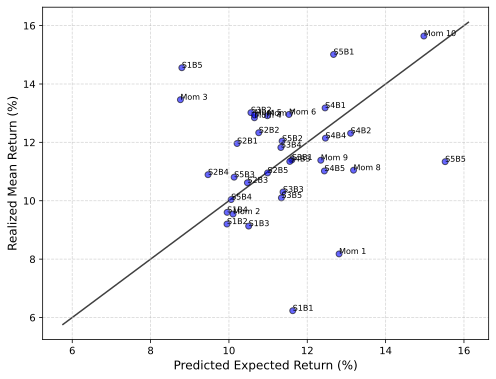

In [50]:
# ==========================================
# 4. 生成 Figure 5 (FF4 / Benchmark)
# ==========================================
# 原文用的是 5因子(含 Bond PC1)，你用 FF3 + Mom 代替
if 'Mom' in factors_annual.columns:
    fig, ax = plt.subplots(figsize=(8, 6))
    plot_realized_vs_predicted(
        factors=factors_annual[['Mkt-RF', 'SMB', 'HML', 'Mom']], 
        portfolios=df_portfolios, 
        model_name="FF3 + Momentum Benchmark (2010-2025)",
        ax=ax
    )
    plt.savefig('figs/OOS-FF4.png', dpi=800)
    plt.show()
else:
    print("缺少 Momentum 因子，无法生成 Figure 5 的替代图。")

- 展示 2010-2025 的散点图 (Realized vs Predicted Returns)，点会变成一团乱云 (Cloud）
- 对比Pre-2010 (原论文): 点紧密围绕 45 度线，就像一条漂亮的斜线
- 点很散乱，回归线是平的，可以得出结论："The factor suggests a structural break." (因子出现了结构性断裂)。
- 特别注意 Momentum (动量) 组合：它们在纵轴上（实际收益）很高，但在横轴上（预测收益）很低。这说明 LevFac 认为动量组合风险很低，不应该有高收益，但实际上动量组合依然赚了很多钱。这叫 "Pricing Error" (定价误差)。

In [51]:
merged_data_OOS = pd.concat([test_assets_excess, ff_factors_quarterly, current_data[['LevFac']], ff_Mom_quarterly, benchmark_6_quarterly], axis=1).sort_index()
merged_data_OOS = merged_data_OOS.loc["2010Q1":].dropna()
merged_data_OOS.tail(3)

,S1B1,S1B2,S1B3,S1B4,S1B5,S2B1,S2B2,S2B3,S2B4,S2B5,...,HML,RF,LevFac,Mom,SMALL LoBM,ME1 BM2,SMALL HiBM,BIG LoBM,ME2 BM2,BIG HiBM
2024Q4,0.039895,-0.040790,-0.061565,-0.070754,-0.029841,-0.011379,-0.006798,-0.070573,-0.044647,-0.050670,...,-0.030125,0.012754,-0.097126,0.072850,0.017050,-0.027869,-0.034393,0.043871,0.013611,0.035362
2025Q1,0.053907,0.037714,0.015817,0.006735,0.044252,0.086671,0.048240,0.035631,0.047009,0.040900,...,-0.012710,0.011443,0.068652,0.016637,0.084106,0.043773,0.050005,0.084026,0.026841,0.089386
2025Q2,-0.203917,-0.169784,-0.155681,-0.167708,-0.121576,-0.164697,-0.169969,-0.189775,-0.151799,-0.179155,...,0.042820,0.010235,0.015908,0.011627,-0.158280,-0.158690,-0.136560,-0.095844,-0.071433,-0.032713


SMALL LoBM    0.244163
ME1 BM2       1.620373
SMALL HiBM   -1.370338
BIG LoBM     -0.222442
ME2 BM2      -0.691407
BIG HiBM      0.270585
Mom           1.149067
dtype: float64
        SMALL LoBM   ME1 BM2  SMALL HiBM  BIG LoBM   ME2 BM2  BIG HiBM  \
2010Q1    0.066590  0.067865    0.096796  0.041691  0.058890  0.011886   
2010Q2    0.148525  0.195611    0.278892  0.093147  0.129533  0.148824   
2010Q3   -0.052402 -0.083691   -0.144909 -0.055479 -0.070069 -0.113088   
2010Q4    0.109176  0.084876    0.050825  0.103043  0.088602  0.012739   
2011Q1    0.105165  0.128468    0.133469  0.076043  0.109366  0.114470   
...            ...       ...         ...       ...       ...       ...   
2024Q2   -0.009513  0.007963   -0.005629  0.044616  0.060079  0.045903   
2024Q3    0.139270  0.121043    0.158832  0.107287  0.074657  0.104999   
2024Q4    0.017050 -0.027869   -0.034393  0.043871  0.013611  0.035362   
2025Q1    0.084106  0.043773    0.050005  0.084026  0.026841  0.089386   
2025Q2   -

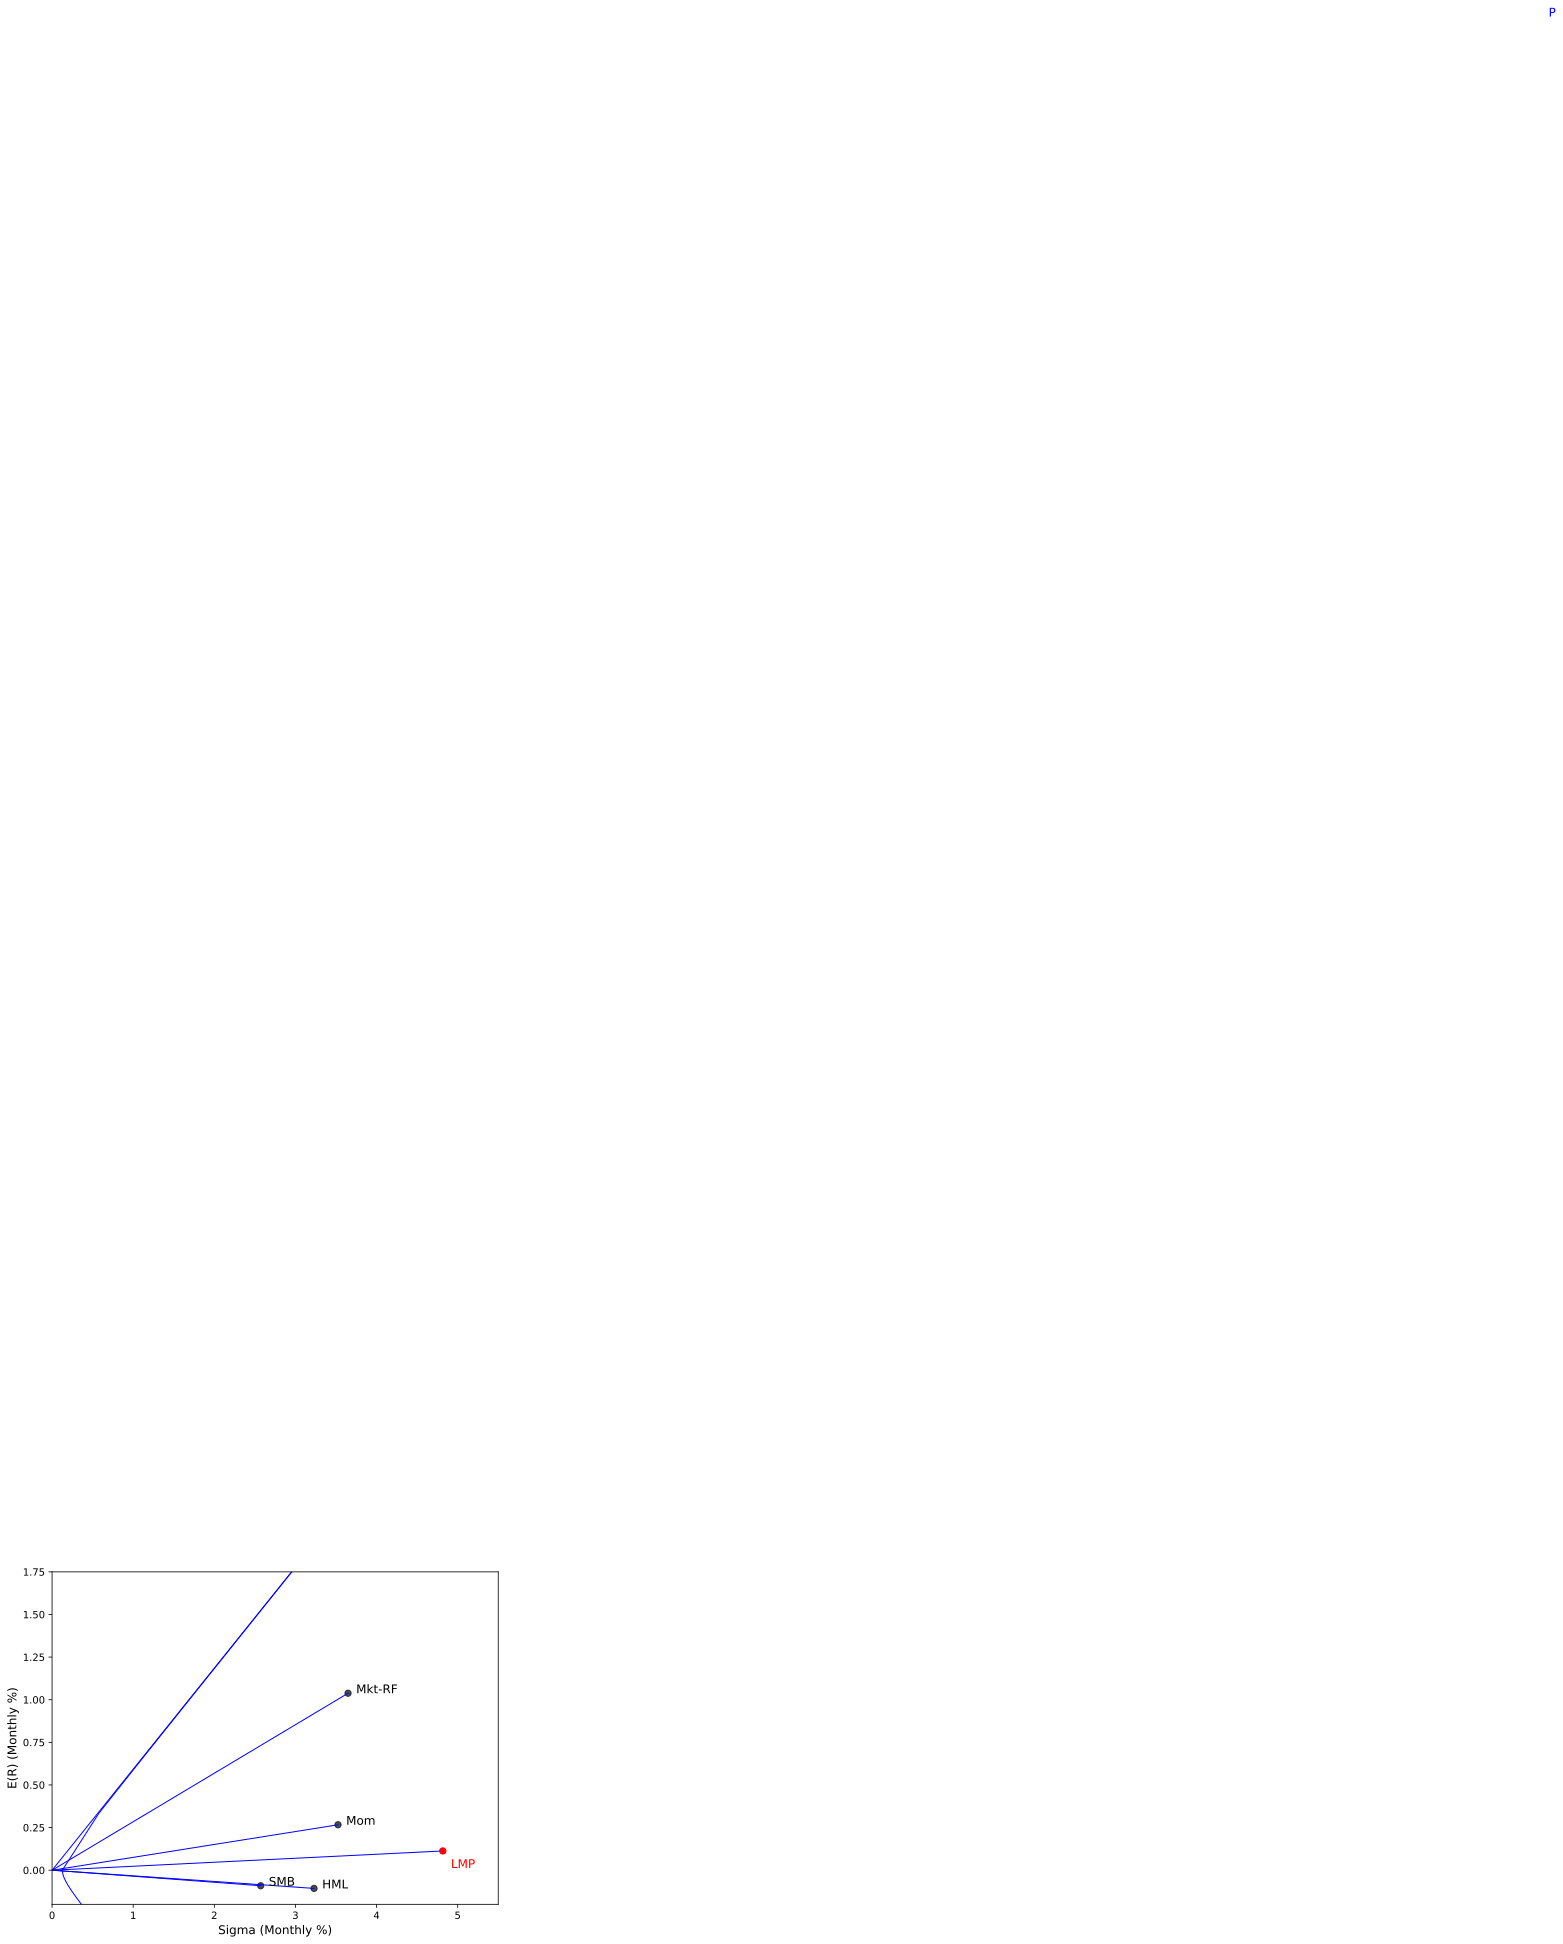

In [52]:
benchmark_name = ['SMALL LoBM', 'ME1 BM2', 'SMALL HiBM', 'BIG LoBM', 'ME2 BM2',
       'BIG HiBM', 'Mom']   # 7 benchmark

# 计算 FMP 收益率
LevFac_LMP,beta = construct_fmp(merged_data_OOS, benchmark_name, factor_name='LevFac')
plot_figure_6(merged_data_OOS, LevFac_LMP, scale='quarter_to_month', fig_name='OOS_FMP')

Using current data, the LMP is located inside the efficient frontier constructed by the 10 benchmark assets. This suggests that the leverage factor, constructed with revised data, fails to span the mean-variance efficient frontier as effectively as claimed in the original study.